In [1]:
import pandas as pd
##################### rename diseases based on icd9 codes
df_icd = pd.read_csv('icd9_to_english.txt',sep=',',index_col=False,dtype={'Disease': str, 'Code': str})
dis = df_icd['Disease']
code = df_icd['Code']
icd_to_dis = {}
for i,d in zip(code,dis):
    icd_to_dis[i] = d
#####################    

# Importance Scores

In [2]:
import pandas as pd
from glob import glob
import numpy as np
from collections import defaultdict
# rename columns based on data names
df_loinc = pd.read_csv('loincToEnglish.txt',sep='\t')
new_col = df_loinc['shorter.name']
col_code = df_loinc['code']
# old_cols = fi_lr['short.name'].values
# print('short loinc names:',new_col)
lab_dict = {}
for n,o in zip(new_col, col_code):
    lab_dict[o] = n
# for k,v in lab_dict.items():
#     print(k,v)
# rename diseases based on icd9 codes
df_icd = pd.read_csv('icd9_to_english.txt',sep=',',
                     index_col=False,dtype={'Disease': str, 'Code': str})
# print(df_icd)
# print(df_icd.columns)
dis = df_icd['Disease']
code = df_icd['Code']
icd_to_dis = {}
for i,d in zip(code,dis):
    icd_to_dis[i] = d
# print(icd_to_dis)
resdir = '../results'
frames = []
for f in glob(resdir+'*/'+'icd*/*.imp_score'):
#     print(f)
    df = pd.read_csv(f,sep='\t')
    df['dataset'] = f.split('icd9_')[1].split('_')[0].replace('/','')
    df['disease'] = icd_to_dis[f.split('icd9_')[1].split('_')[0].replace('/','')]
    df['prep'] = 'random' if '/results/' in f else f.split('results_')[-1].split('/')[0]
#     df['rare'] = False if 'noRare' in f else True
    cutoff = f.split('cutoff')[-1].split('_')[0]
    df['cutoff'] = defaultdict(lambda: '1',{'182':'182','365':'365'})[cutoff]
    for val in df['feature'].unique():
        if val in lab_dict.keys():
            df.loc[df['feature']==val,'feature'] = lab_dict[val]
    if 'noRare' in f:
        df['algorithm'] = df['algorithm'].apply(lambda x: x + '_noRare')
    frames.append(df)
    
dfa = pd.concat(frames)
print('datasets:',dfa['dataset'].unique())
print('diseases:',dfa['disease'].unique())
dfa['algorithm'] = dfa['algorithm'].apply(lambda x: 'LR' if x == 'ScaleLR' else x)
print('algorithms:',dfa['algorithm'].unique())
print('cutoff:',dfa['cutoff'].unique())

dfa.head()


datasets: ['250.00' '250.40' '327.23' '331.0' '530.81' '571.8' '585.9']
diseases: ['Diabetes' 'Diabetes with renal manifestations' 'Sleep apnea'
 "Alzheimer's disease" 'Esophageal reflux' 'Liver disease'
 'Kidney disease']
algorithms: ['RF' 'LR' 'XGB']
cutoff: ['1' '182' '365']


,algorithm,alg-parameters,seed,feature,score,dataset,disease,prep,cutoff
0,RF,"bootstrap=True,class_weight=balanced,criterion...",27164,age,0.033517,250.00,Diabetes,random,1
1,RF,"bootstrap=True,class_weight=balanced,criterion...",27164,SEX,0.003023,250.00,Diabetes,random,1
2,RF,"bootstrap=True,class_weight=balanced,criterion...",27164,RACE,0.001096,250.00,Diabetes,random,1
3,RF,"bootstrap=True,class_weight=balanced,criterion...",27164,ETHNICITY,0.004978,250.00,Diabetes,random,1
4,RF,"bootstrap=True,class_weight=balanced,criterion...",27164,Anion gap,0.013622,250.00,Diabetes,random,1


# Permutation Scores

In [3]:
import pandas as pd
from glob import glob
import numpy as np
from collections import defaultdict
# rename columns based on data names
df_loinc = pd.read_csv('loincToEnglish.txt',sep='\t')
new_col = df_loinc['shorter.name']
col_code = df_loinc['code']
# old_cols = fi_lr['short.name'].values
# print('short loinc names:',new_col)
lab_dict = {}
for n,o in zip(new_col, col_code):
    lab_dict[o] = n
# rename diseases based on icd9 codes
df_icd = pd.read_csv('icd9_to_english.txt',sep=',',
                     index_col=False,dtype={'Disease': str, 'Code': str})
dis = df_icd['Disease']
code = df_icd['Code']
icd_to_dis = {}
for i,d in zip(code,dis):
    icd_to_dis[i] = d
# print(icd_to_dis)
frames = []
for f in glob(resdir+'*/'+'icd*/*.perm_score'):
#     print(f)
    df = pd.read_csv(f,sep='\t',names=['algorithm', 'alg-parameters', 'seed', 'feature', 
                                         'score'])
    df['dataset'] = f.split('icd9_')[1].split('_')[0].replace('/','')
    df['disease'] = icd_to_dis[f.split('icd9_')[1].split('_')[0].replace('/','')]
    df['prep'] = 'random' if '/results/' in f else f.split('results_')[-1].split('/')[0]
#     df['rare'] = False if 'noRare' in f else True
    cutoff = f.split('cutoff')[-1].split('_')[0]
    df['cutoff'] = defaultdict(lambda: '1',{'182':'182','365':'365'})[cutoff]
    for val in df['feature'].unique():
        if val in lab_dict.keys():
            df.loc[df['feature']==val,'feature'] = lab_dict[val]
    if 'noRare' in f:
        df['algorithm'] = df['algorithm'].apply(lambda x: x + '_noRare')
    frames.append(df)
    
df_perm = pd.concat(frames)
print('datasets:',df_perm['dataset'].unique())
print('diseases:',df_perm['disease'].unique())
df_perm['algorithm'] = df_perm['algorithm'].apply(lambda x: 'LR' if x == 'ScaleLR' else x)
print('algorithms:',df_perm['algorithm'].unique())
print('cutoff:',df_perm['cutoff'].unique())

# df_perm.head()

datasets: ['250.00' '250.40' '327.23' '331.0' '530.81' '571.8' '585.9']
diseases: ['Diabetes' 'Diabetes with renal manifestations' 'Sleep apnea'
 "Alzheimer's disease" 'Esophageal reflux' 'Liver disease'
 'Kidney disease']
algorithms: ['RF' 'LR' 'XGB']
cutoff: ['1' '182' '365']


# Univariate scores

In [4]:
import pandas as pd
from glob import glob
import numpy as np
from collections import defaultdict
import sys
# rename columns based on data names
df_loinc = pd.read_csv('loincToEnglish.txt',sep='\t')
new_col = df_loinc['shorter.name']
col_code = df_loinc['code']
# old_cols = fi_lr['short.name'].values
# print('short loinc names:',new_col)
lab_dict = {}
for n,o in zip(new_col, col_code):
    lab_dict[o] = n
# for k,v in lab_dict.items():
#     print(k,v)
# rename diseases based on icd9 codes
df_icd = pd.read_csv('icd9_to_english.txt',sep=',',
                     index_col=False,dtype={'Disease': str, 'Code': str})
# print(df_icd)
# print(df_icd.columns)
dis = df_icd['Disease']
code = df_icd['Code']
icd_to_dis = {}
for i,d in zip(code,dis):
    icd_to_dis[i] = d
# print(icd_to_dis)
frames = []
for f in glob(resdir+'*/'+'icd*/*.univariate_score'):
#     print(f)
    df = pd.read_csv(f,sep='\t')#,names=['algorithm', 'alg-parameters', 'seed', 'feature', 
#                                          'score'])
#     pdb.set_trace()
#     print(df['algorithm'].unique())
    df['dataset'] = f.split('icd9_')[1].split('_')[0].replace('/','')
    df['disease'] = icd_to_dis[f.split('icd9_')[1].split('_')[0].replace('/','')]
    df['prep'] = 'random' if '/results/' in f else f.split('results_')[-1].split('/')[0]
#     df['rare'] = False if 'noRare' in f else True
    cutoff = f.split('cutoff')[-1].split('_')[0]
    df['cutoff'] = defaultdict(lambda: '1',{'182':'182','365':'365'})[cutoff]
    for val in df['feature'].unique():
        if val in lab_dict.keys():
            df.loc[df['feature']==val,'feature'] = lab_dict[val]
    if 'noRare' in f:
        df['algorithm'] = df['algorithm'].apply(lambda x: x + '_noRare')
    frames.append(df)
    
df_univariate= pd.concat(frames)
print('datasets:',df_univariate['dataset'].unique())
print('diseases:',df_univariate['disease'].unique())
print('algorithms:',df_univariate['algorithm'].unique())
print('cutoff:',df_univariate['cutoff'].unique())

df_univariate.head()

datasets: ['250.00' '250.40' '327.23' '331.0' '530.81' '571.8' '585.9']
diseases: ['Diabetes' 'Diabetes with renal manifestations' 'Sleep apnea'
 "Alzheimer's disease" 'Esophageal reflux' 'Liver disease'
 'Kidney disease']
algorithms: ['Univariate LR']
cutoff: ['1' '182' '365']


,algorithm,alg-parameters,seed,feature,score,dataset,disease,prep,cutoff
0,Univariate LR,"C=1000,class_weight=None,dual=False,fit_interc...",4180,age,0.518248,250.00,Diabetes,random,1
1,Univariate LR,"C=1000,class_weight=None,dual=False,fit_interc...",4180,SEX,0.114234,250.00,Diabetes,random,1
2,Univariate LR,"C=1000,class_weight=None,dual=False,fit_interc...",4180,RACE,0.094746,250.00,Diabetes,random,1
3,Univariate LR,"C=1000,class_weight=None,dual=False,fit_interc...",4180,ETHNICITY,0.111781,250.00,Diabetes,random,1
4,Univariate LR,"C=1000,class_weight=None,dual=False,fit_interc...",4180,Anion gap,0.656064,250.00,Diabetes,random,1


# scatter plot: all pairwise MLs (feature importance/permutation) 

LR RF importance
LR RF importance
LR RF importance
LR RF importance
LR RF importance
LR RF importance
LR RF importance
LR XGB importance
LR XGB importance
LR XGB importance
LR XGB importance
LR XGB importance
LR XGB importance
LR XGB importance
RF XGB importance
RF XGB importance
RF XGB importance
RF XGB importance
RF XGB importance
RF XGB importance
RF XGB importance


/home/bill/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


LR RF permutation
LR RF permutation
LR RF permutation
LR RF permutation
LR RF permutation
LR RF permutation
LR RF permutation
LR XGB permutation
LR XGB permutation
LR XGB permutation
LR XGB permutation
LR XGB permutation
LR XGB permutation
LR XGB permutation
RF XGB permutation
RF XGB permutation
RF XGB permutation
RF XGB permutation
RF XGB permutation
RF XGB permutation
RF XGB permutation


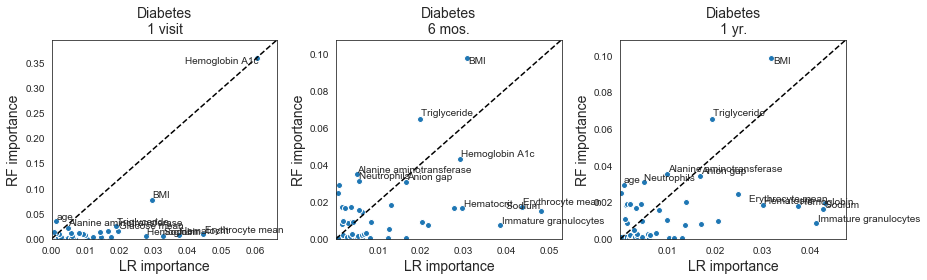

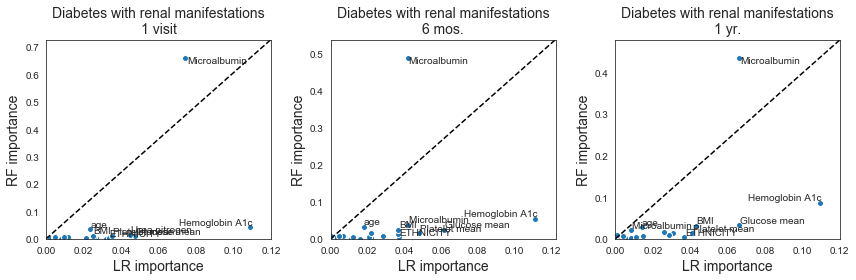

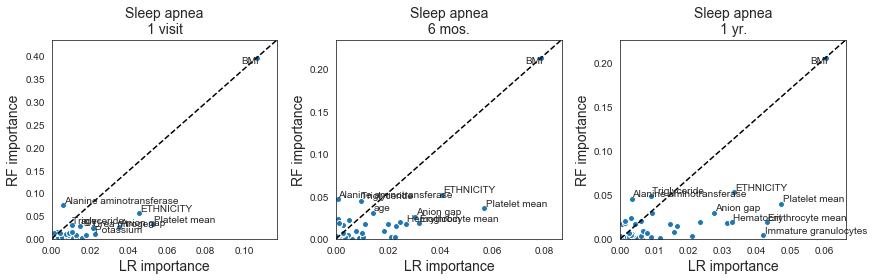

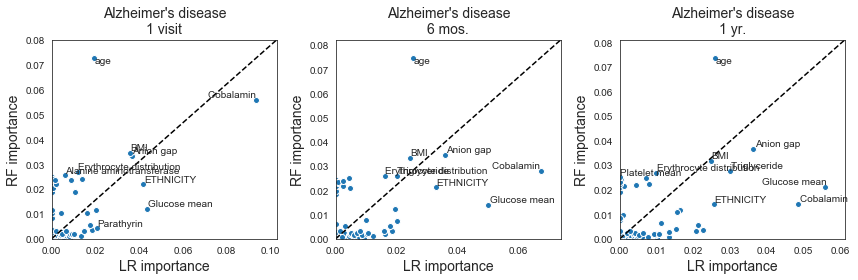

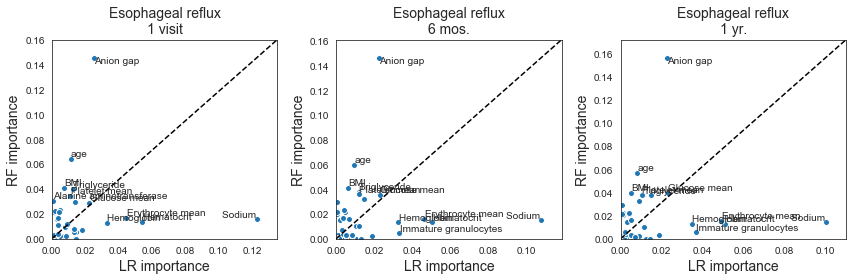

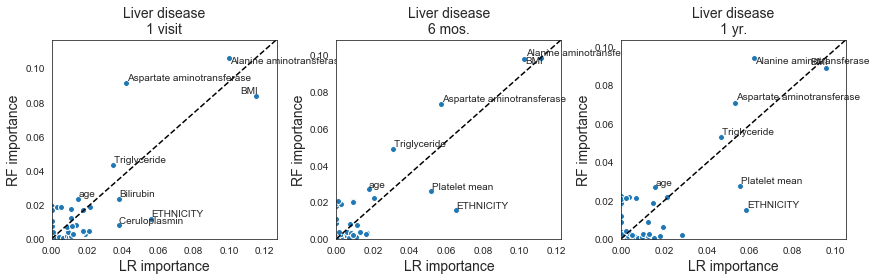

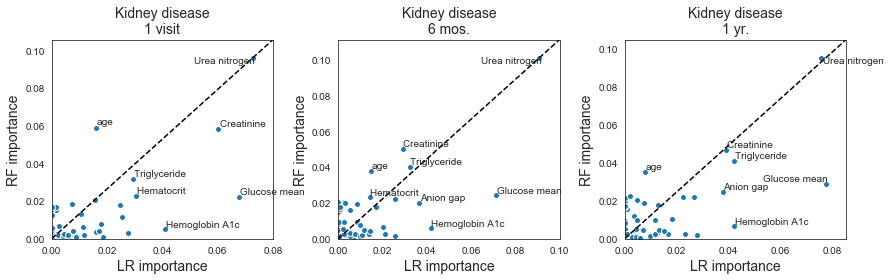

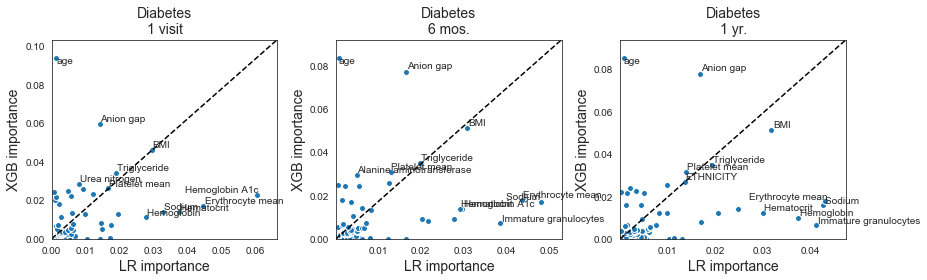

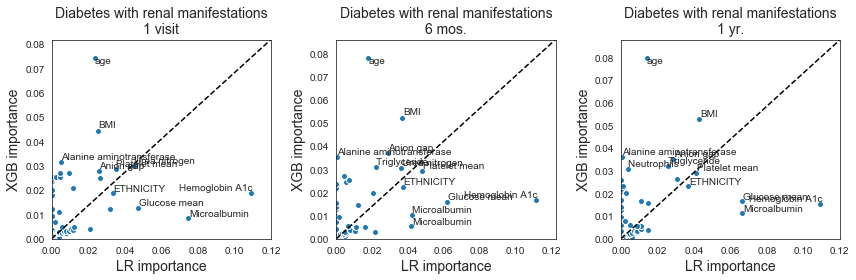

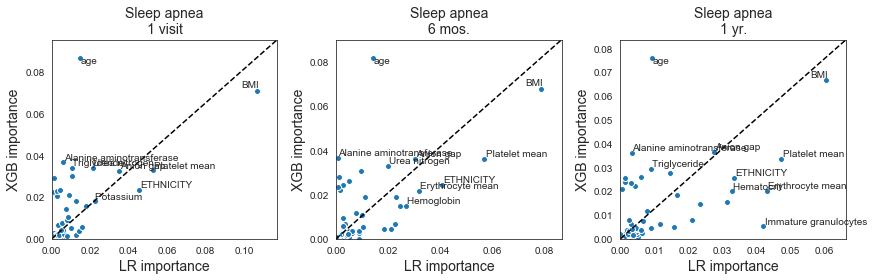

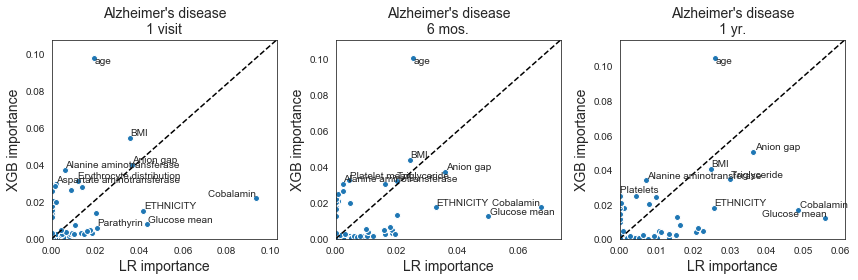

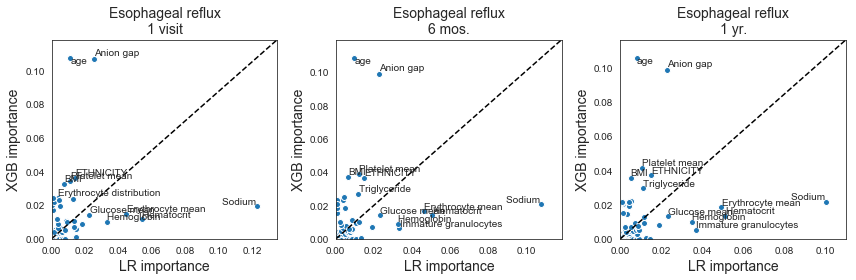

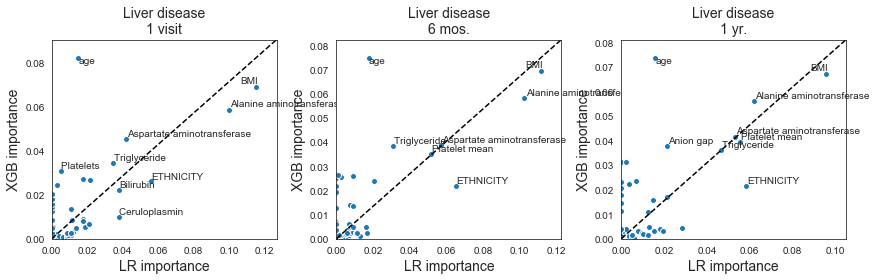

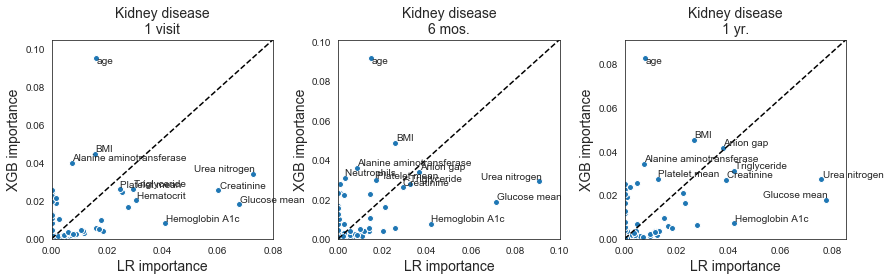

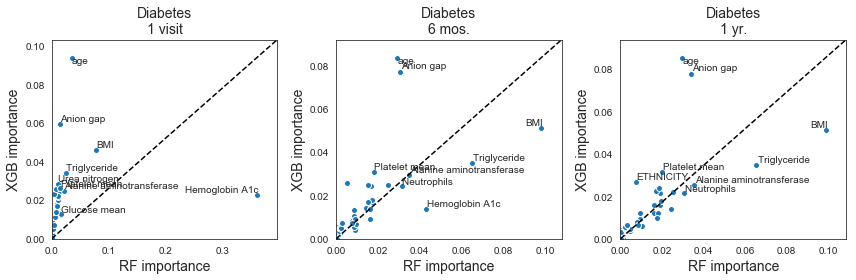

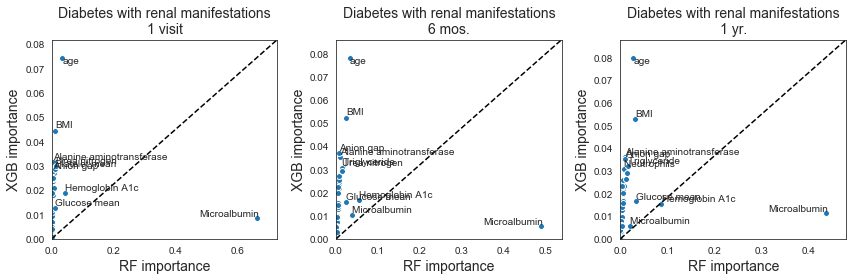

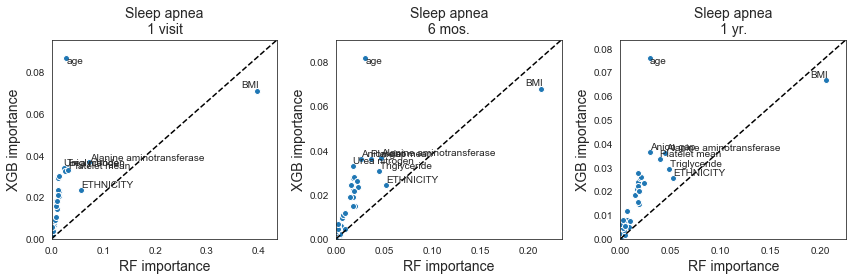

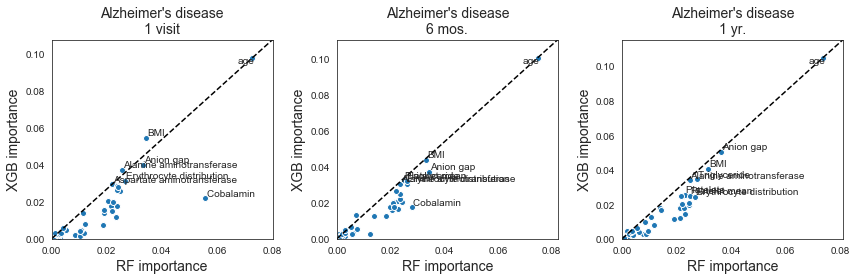

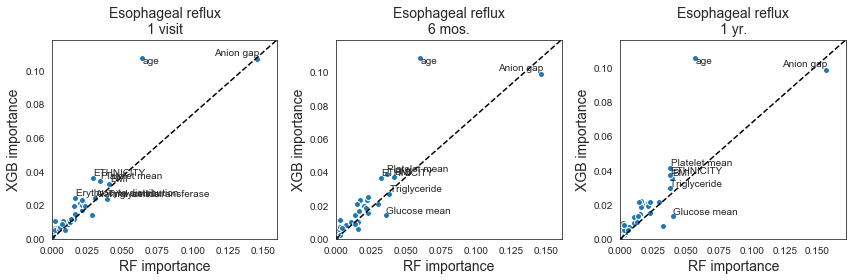

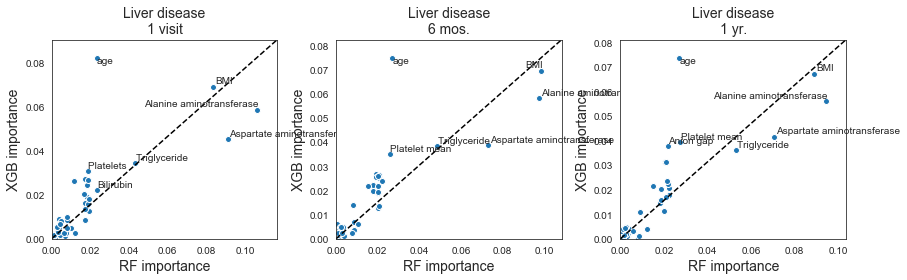

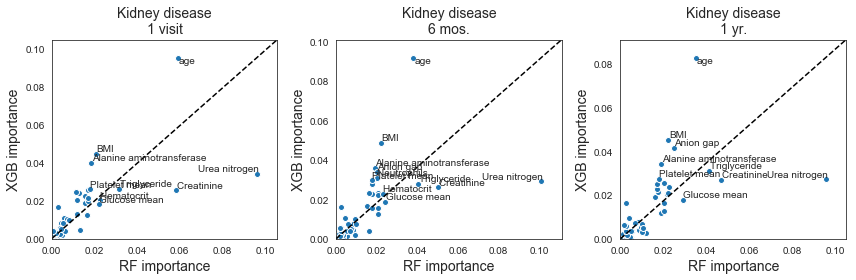

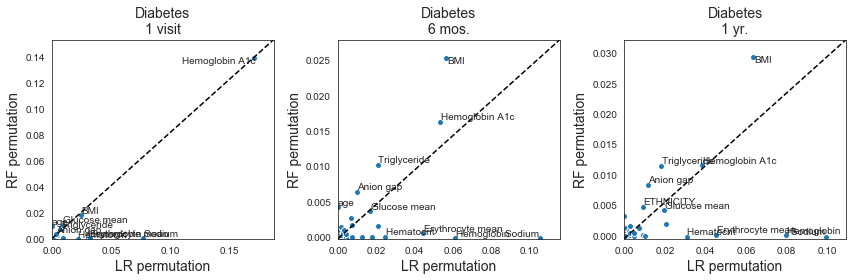

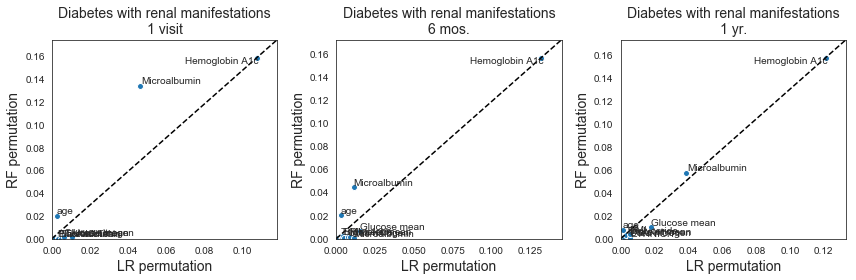

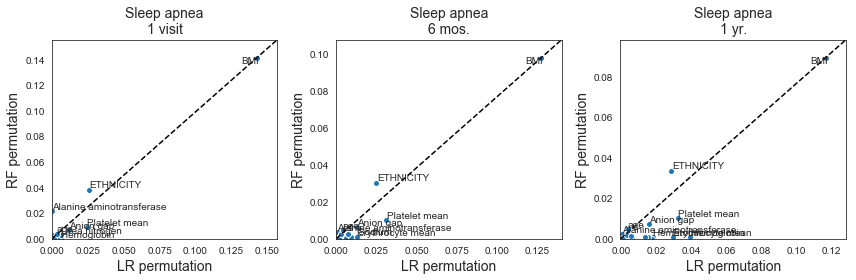

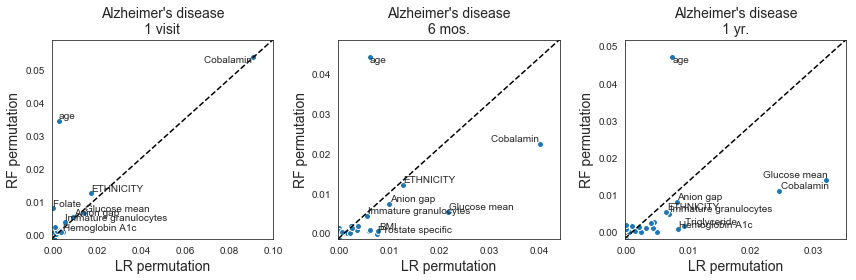

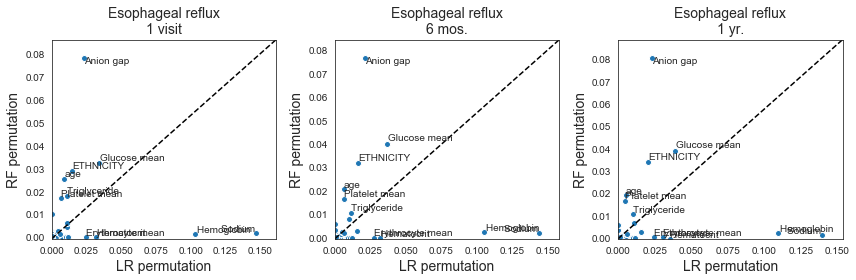

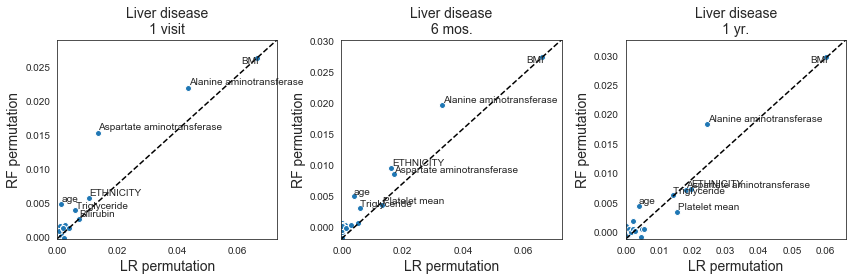

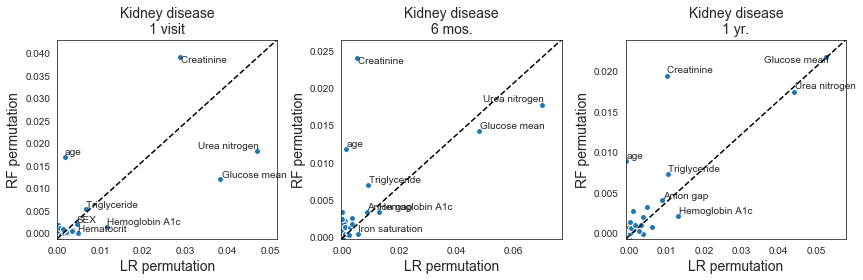

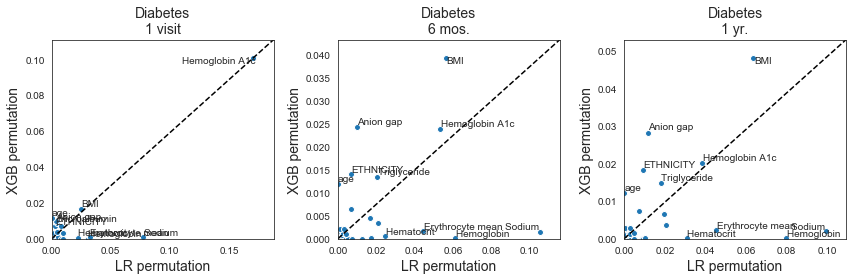

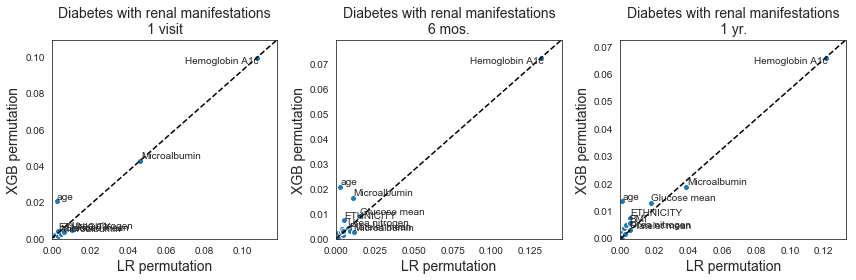

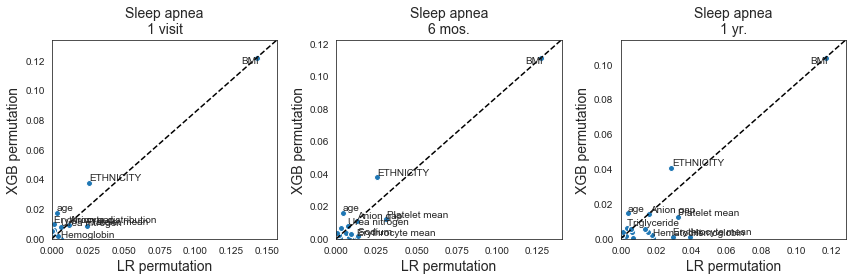

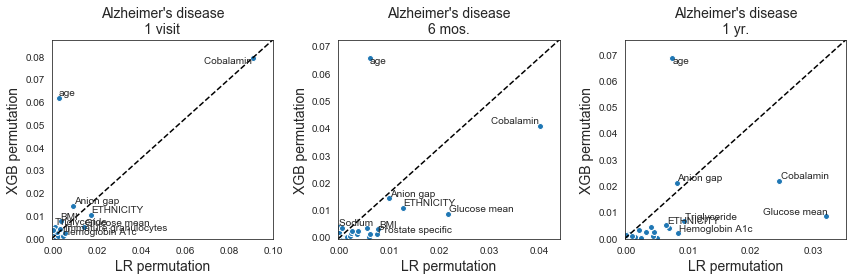

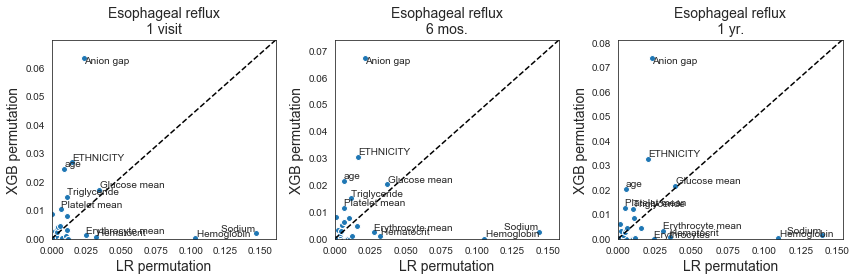

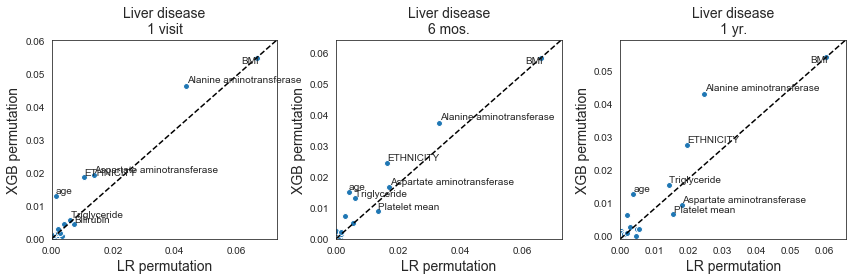

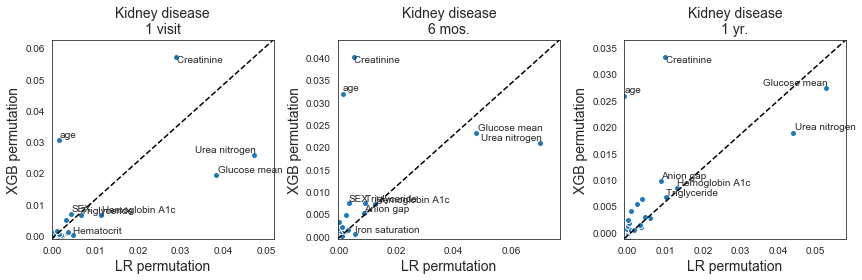

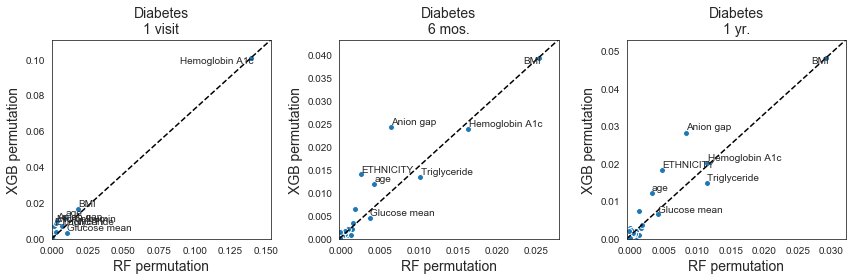

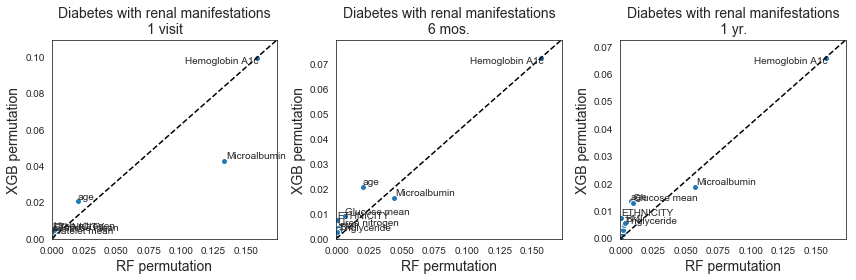

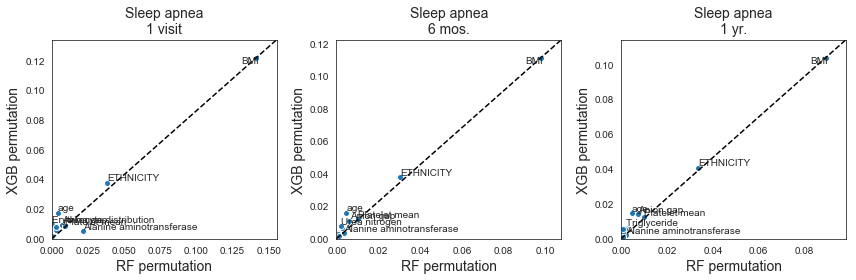

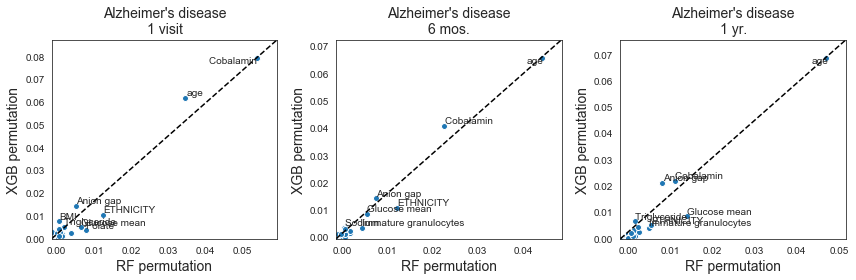

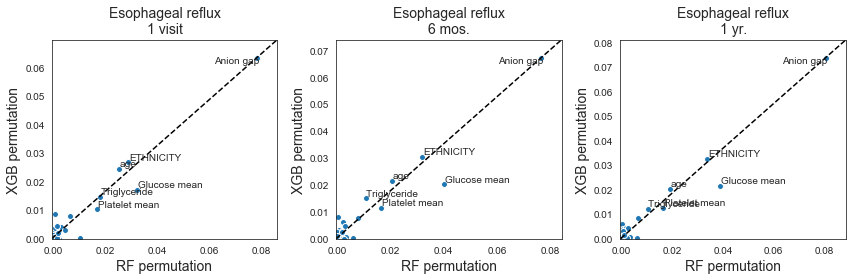

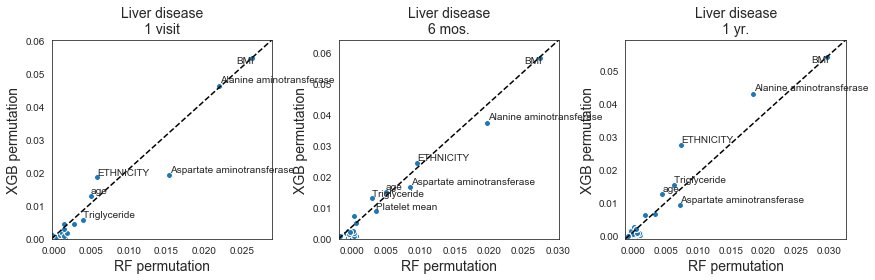

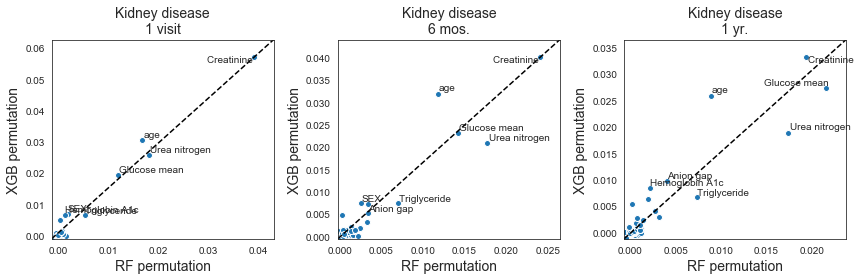

In [5]:
import re
import matplotlib.pyplot as plt

%matplotlib inline 
import matplotlib 
matplotlib.rc('figure', figsize=(5, 10))
import seaborn as sns
sns.set_style('white')
import pdb
import numpy as np
pal = sns.color_palette('cividis',n_colors=len(dfa.algorithm.unique()))
MLS = ['LR','RF','XGB']
import itertools as it
for i, dfs in enumerate([dfa,df_perm]):
    name = 'importance' if i==0 else 'permutation' 
    for ML1, ML2 in it.combinations(MLS,2):
        for dataset, dffd in dfs.groupby('dataset'):
            print(ML1,ML2,name) 
            fig = plt.figure(figsize=(12,4))
            for i,(cutoff,df) in enumerate(dffd.groupby('cutoff',sort=True)):
                try:
                    ax = fig.add_subplot(1,len(dffd['cutoff'].unique()), i+1)
                    dfp =  df.groupby(['algorithm','feature']).median().unstack(['algorithm'])

                    dfpn = df.groupby(['feature','algorithm']).median().groupby('feature').sum().unstack()


                    dfpn = dfpn['score'].sort_values(ascending=True)
                    # sort by median feature importance
                    nf = 200
                    dfp = dfp.loc[dfpn.index[-nf:]]
                    h = plt.scatter(dfp['score'][ML1],dfp['score'][ML2],edgecolor='w')
                    text_quant = 0.95
                    for idx in dfp.index:
                        if (dfp.loc[idx]['score',ML1] > dfp['score',ML1].quantile(text_quant) or
                            dfp.loc[idx]['score',ML2] > dfp['score',ML2].quantile(text_quant)):
                            if dfp.loc[idx]['score',ML1] > dfp['score',ML1].quantile(0.995):
                                ha='right'
                            else:
                                ha='left'
                            if dfp.loc[idx]['score',ML2] > dfp['score',ML2].quantile(0.995):
                                va='top'
                            else:
                                va='bottom'
                            plt.text(dfp.loc[idx]['score',ML1]*1.01,dfp.loc[idx]['score',ML2]*1.01,idx,
                                     size=10,va=va,ha=ha)
                    
                    plt.xlabel(ML1+' ' +name,size=14)
                    plt.ylabel(ML2+' ' +name,size=14)
                    xmax = dfp['score'][ML1].max()  
                    xmax  = xmax+ 0.1*np.abs(xmax)
                    xmin = dfp['score'][ML1].min() 
                    xmin = xmin - 0.1*np.abs(xmin) 
                    ymax = dfp['score'][ML2].max() 
                    ymax = ymax+ 0.1*np.abs(ymax)
                    ymin = dfp['score'][ML2].min() 
                    ymin = ymin- 0.1*np.abs(ymin)
                    plt.plot([xmin,xmax],[ymin,ymax],'--k')
                    plt.xlim(xmin,xmax)
                    plt.ylim(ymin,ymax)

                    disease = df['disease'].values[0]
                    plt.title(disease+'\n'+{'1':'1 visit','182':'6 mos.','365':'1 yr.'}[cutoff],size=14)
                    plt.tight_layout()
#                     plt.savefig('../paper/figs/' + resdir.split('/')[1] + '/imp_score/scatter_plots/' 
#                                 + '_'.join(['-'.join(re.split('\.',dataset)),
#                                             '-'.join(re.split(' |,\.',disease)),
#                                             'scatter_'+ ML1 + 'v' + ML2 + '_'+name+'_scores.pdf']), 
#                                 bbox_inches='tight')
                except Exception as e:
                    print('ERROR:',e)



# heamap of R2 comparisons of feature importance 
for each disease, make a square matrix with rows and columns for: 
LR importance, RF importance, XGB importance, LR permutation, RF permutation, XGB permutation
plot a heatmap of the correlations

                  LR-importance  RF-importance  XGB-importance  \
LR-importance          1.000000       0.608400        0.580601   
RF-importance          0.608400       1.000000        0.920660   
XGB-importance         0.580601       0.920660        1.000000   
LR-permutation         0.897510       0.497391        0.441191   
RF-permutation         0.740136       0.661114        0.794346   
XGB-permutation        0.751038       0.663009        0.800478   
Univariate-Score       0.380258       0.605250        0.539615   

                  LR-permutation  RF-permutation  XGB-permutation  \
LR-importance           0.897510        0.740136         0.751038   
RF-importance           0.497391        0.661114         0.663009   
XGB-importance          0.441191        0.794346         0.800478   
LR-permutation          1.000000        0.741540         0.715529   
RF-permutation          0.741540        1.000000         0.975350   
XGB-permutation         0.715529        0.975350         

[Text(0.5,0,'LR-importance'),
 Text(1.5,0,'RF-importance'),
 Text(2.5,0,'XGB-importance'),
 Text(3.5,0,'LR-permutation'),
 Text(4.5,0,'RF-permutation'),
 Text(5.5,0,'XGB-permutation'),
 Text(6.5,0,'Univariate-Score')]

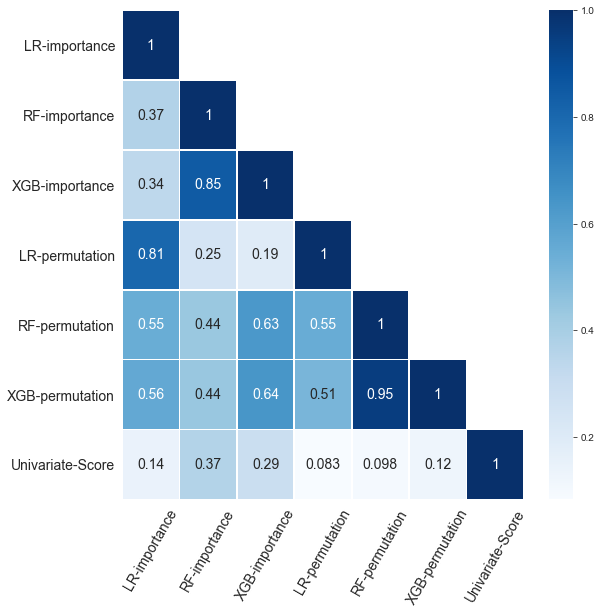

In [6]:
df = pd.DataFrame()
for grp in ['LR','RF','XGB']:
    df[grp + '-importance'] = dfa.loc[dfa.algorithm==grp].groupby('feature')['score'].median()
    df[grp + '-permutation'] = df_perm.loc[df_perm.algorithm==grp].groupby('feature')['score'].median()
df['Univariate-Score'] = df_univariate.groupby('feature')['score'].median()
# filter out to top 10
# nf = 300
# # df['median-Feature-importance'] = df.median(axis=1)
# sort_index = df['XGB-permutation'].sort_values(ascending=True).index
# import pdb
# # pdb.set_trace()
# print('sort index:',sort_index)
# df = df.loc[sort_index]
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
order = ['LR-importance','RF-importance','XGB-importance',
        'LR-permutation','RF-permutation','XGB-permutation',
        'Univariate-Score']
df = df[order]
# corr = np.square(df.corr(method='spearman'))
corr = np.square(df.corr(method='pearson'))
# corr = np.square(df.corr())
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask,k=1)] = True
print(df.corr())
h = plt.figure(figsize=(9, 9))
ax = sns.heatmap(corr,mask=mask,robust=True,cmap="Blues",
#                row_colors=network_colors, col_colors=network_colors,
               linewidths=.75,annot=True,annot_kws={'size':14})
ax.set_yticklabels(ax.get_yticklabels(),rotation=0,size=14)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,ha='center',size=14)
# plt.savefig('../paper/figs/'+resdir.replace('../','')+'/imp_score/feature_importance_corr_heatmap.pdf',
#            bbox_inches='tight')

# feature importance heat map for all diseases 

(7, 12)
(7, 12)
(7, 12)
(7, 12)
(7, 12)
(7, 12)
(7, 12)
(7, 12)
(7, 12)
(7, 12)
(7, 12)


/home/bill/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(7, 12)
(7, 12)
(7, 12)
(7, 12)
(7, 12)
(7, 12)
(7, 12)


<Figure size 432x288 with 0 Axes>

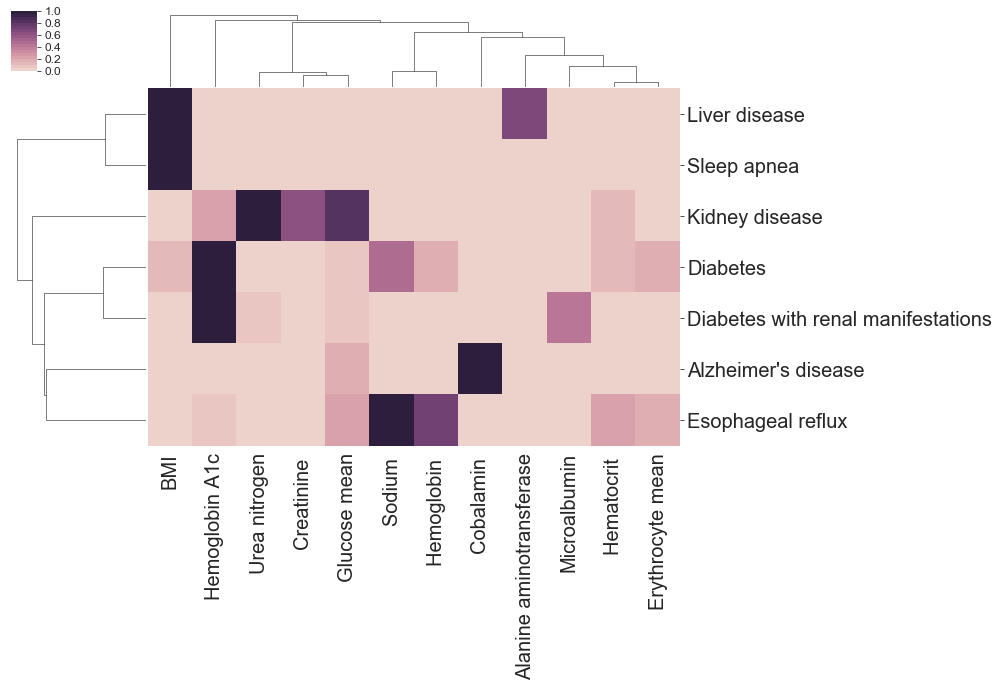

<Figure size 432x288 with 0 Axes>

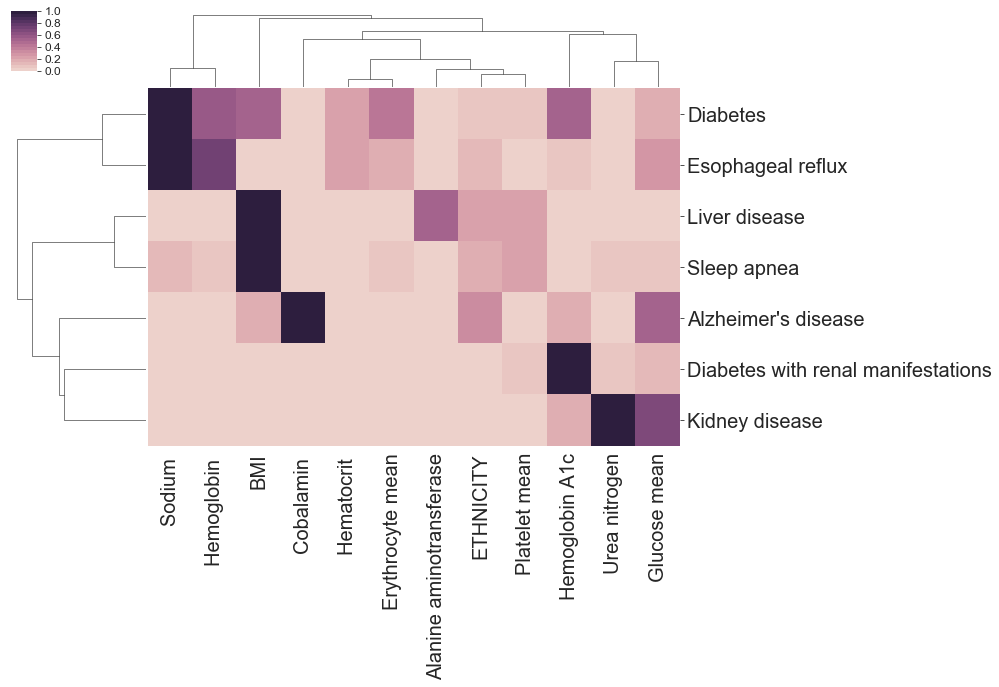

<Figure size 432x288 with 0 Axes>

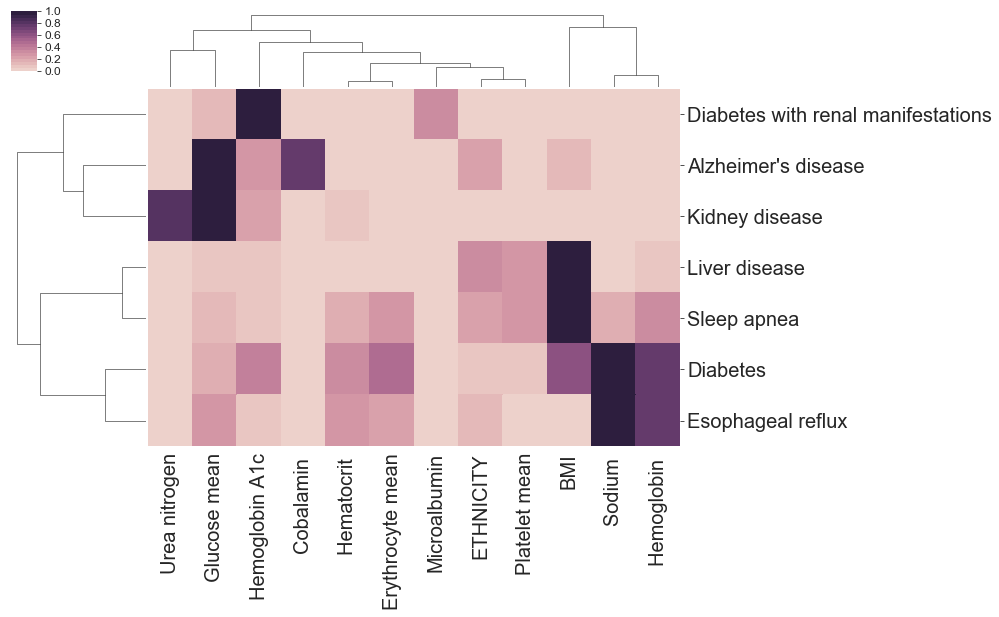

<Figure size 432x288 with 0 Axes>

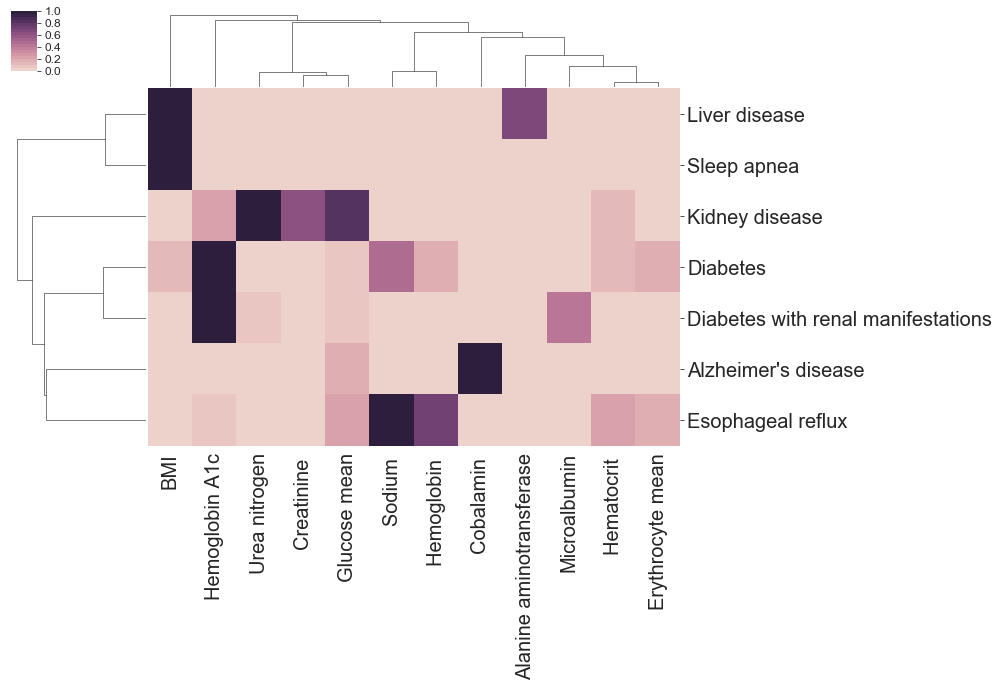

<Figure size 432x288 with 0 Axes>

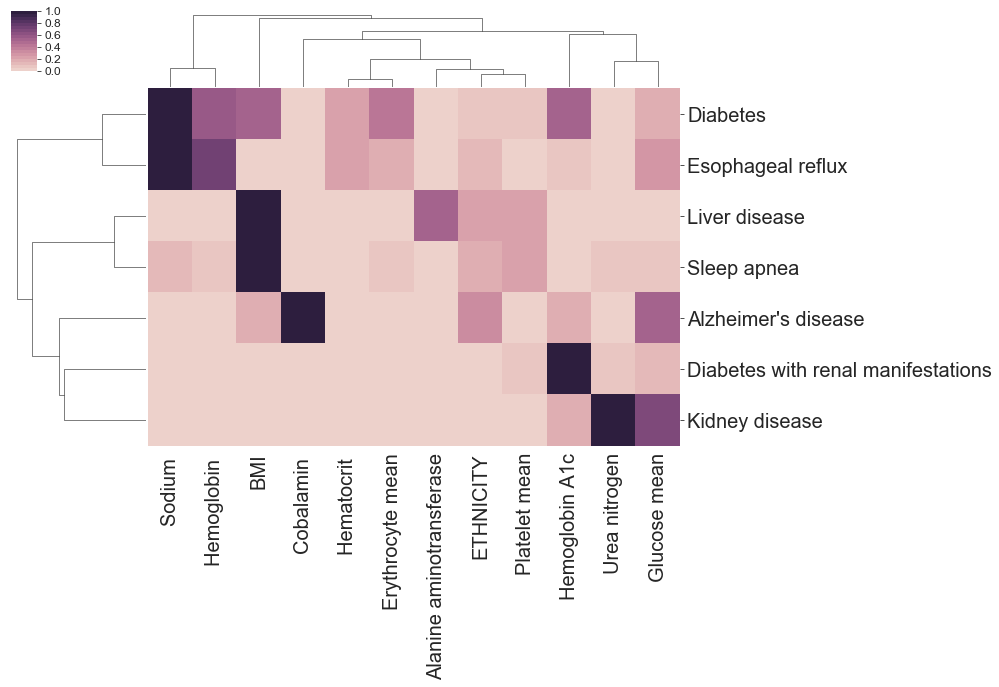

<Figure size 432x288 with 0 Axes>

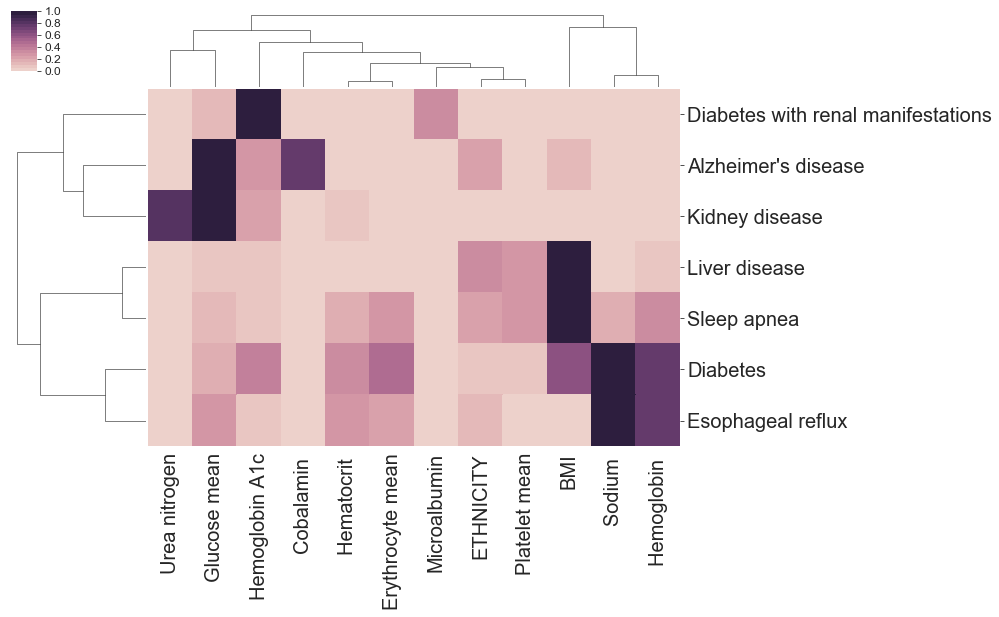

<Figure size 432x288 with 0 Axes>

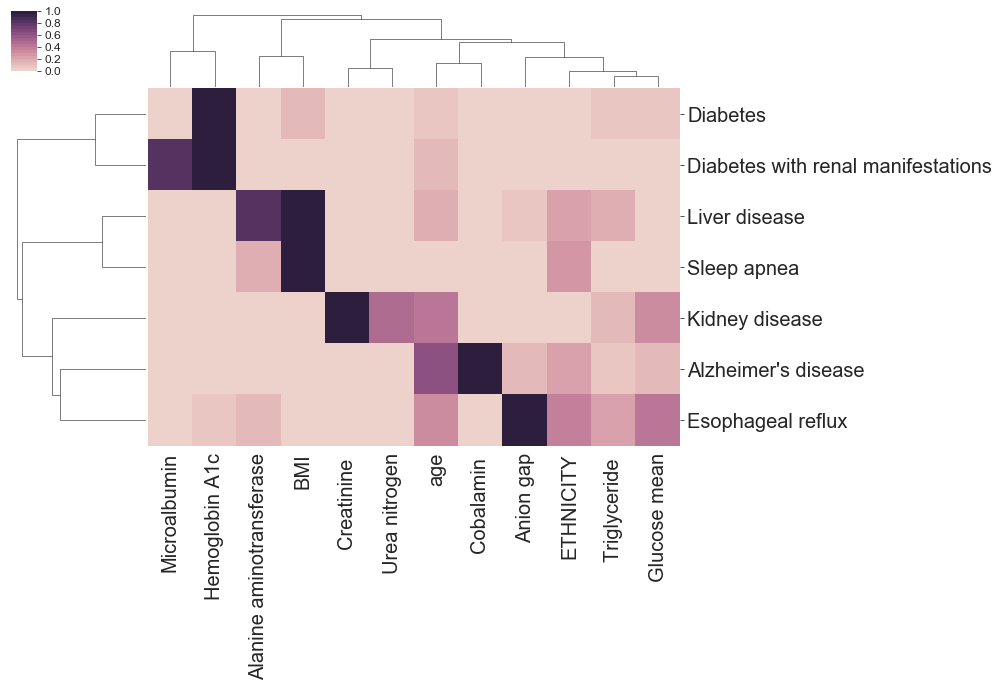

<Figure size 432x288 with 0 Axes>

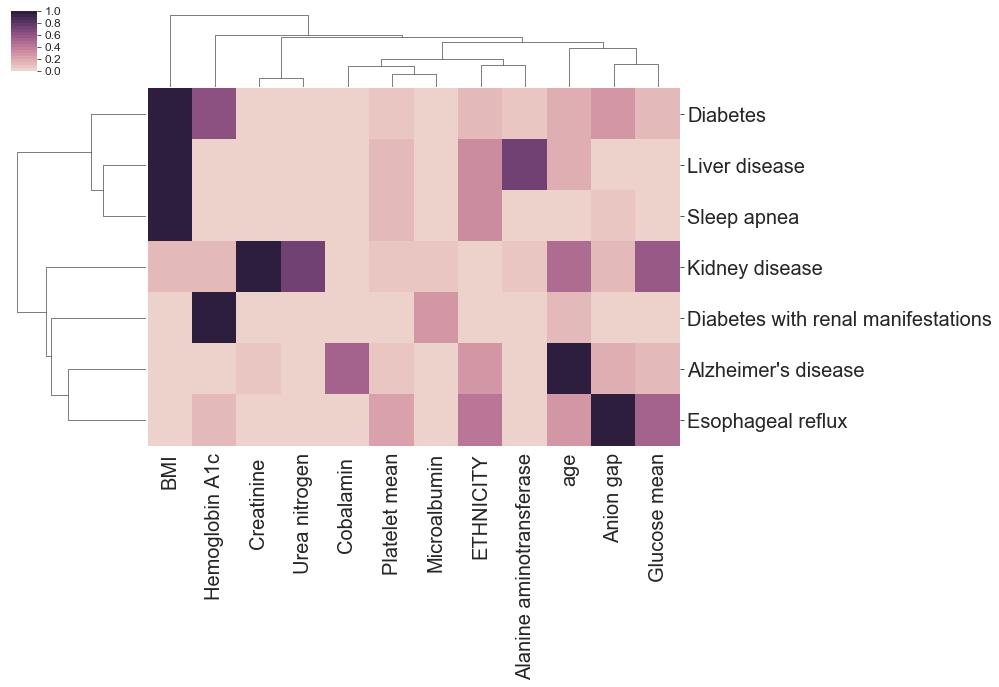

<Figure size 432x288 with 0 Axes>

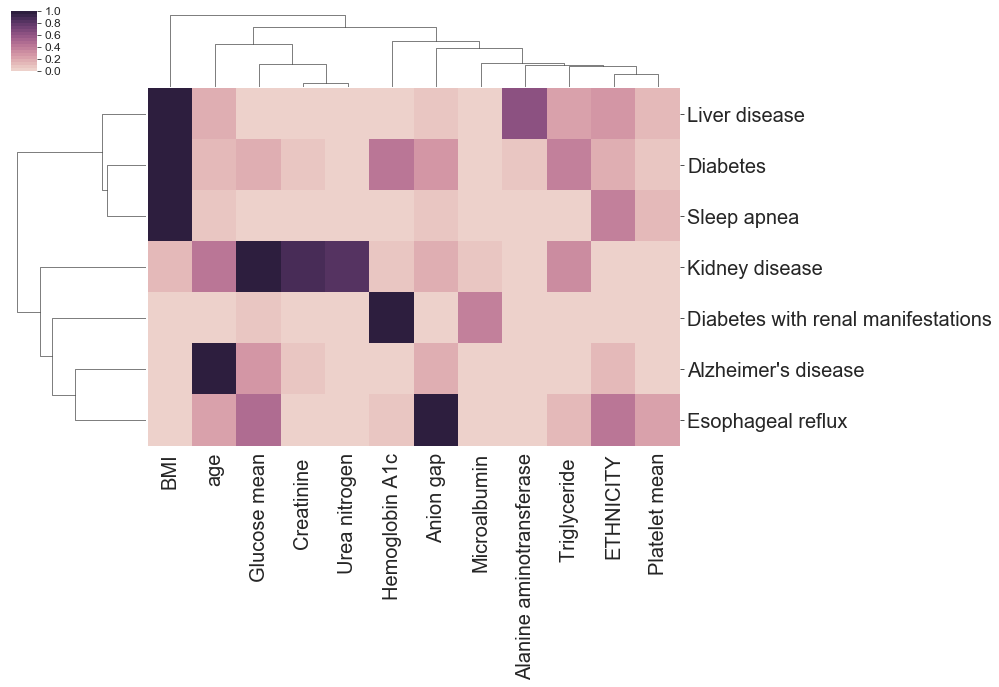

<Figure size 432x288 with 0 Axes>

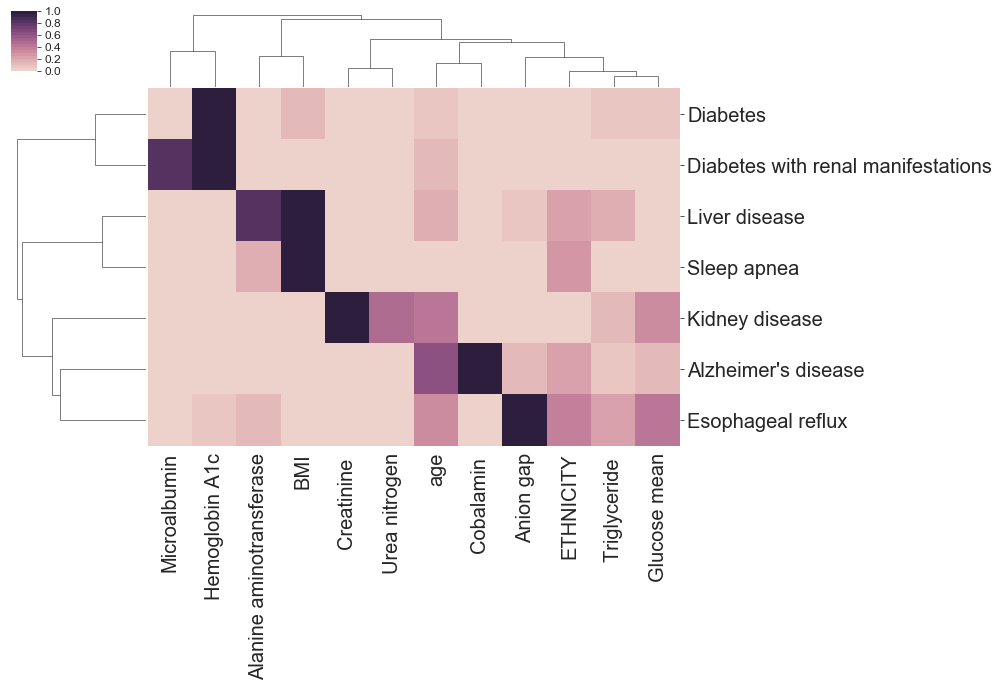

<Figure size 432x288 with 0 Axes>

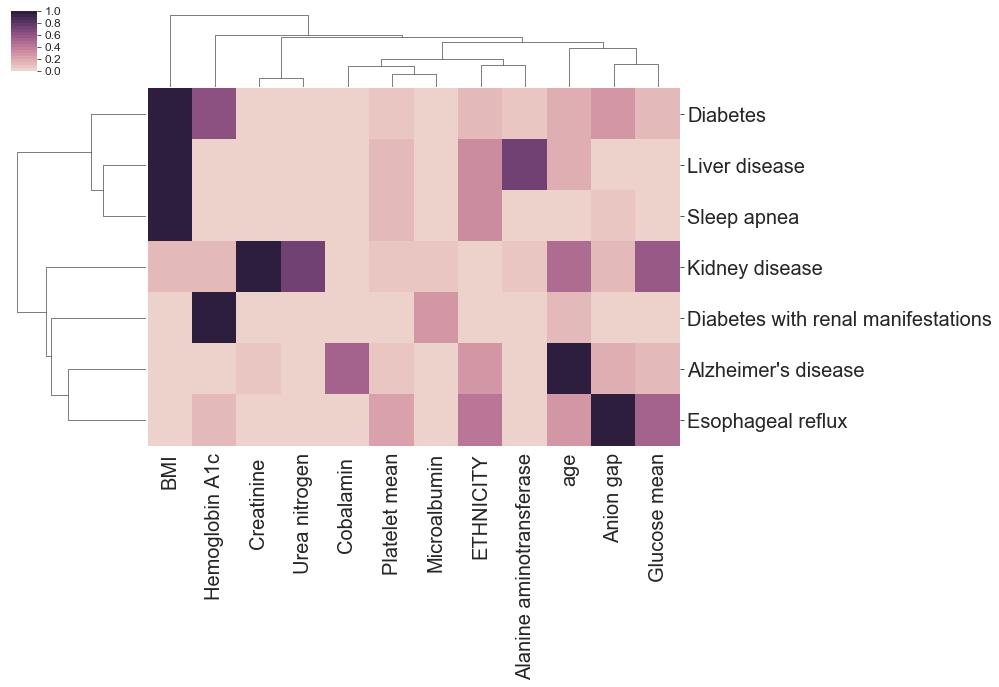

<Figure size 432x288 with 0 Axes>

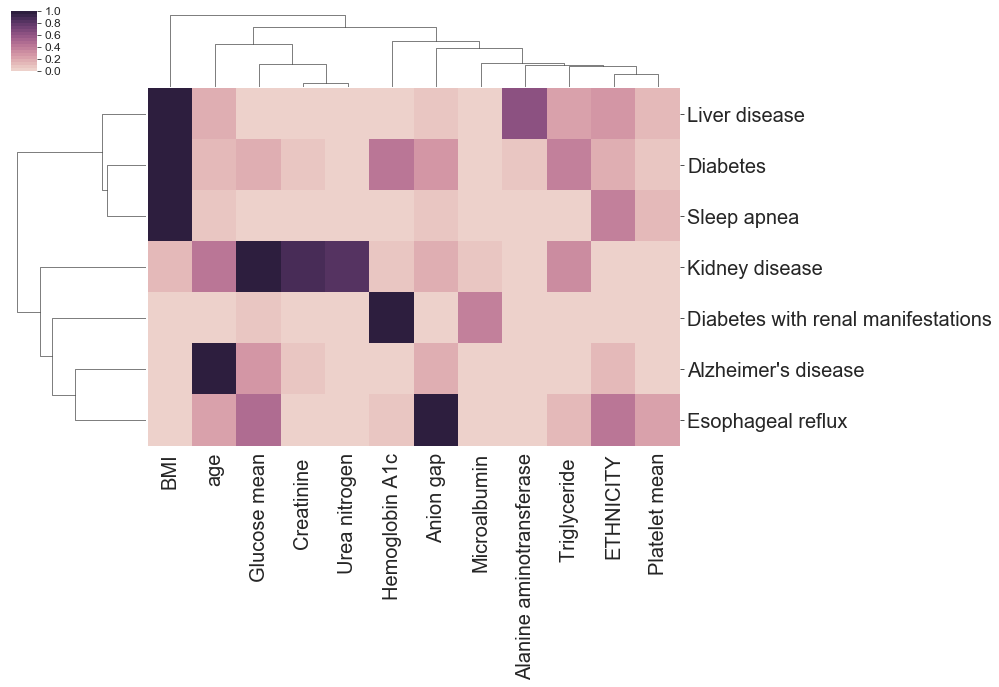

<Figure size 432x288 with 0 Axes>

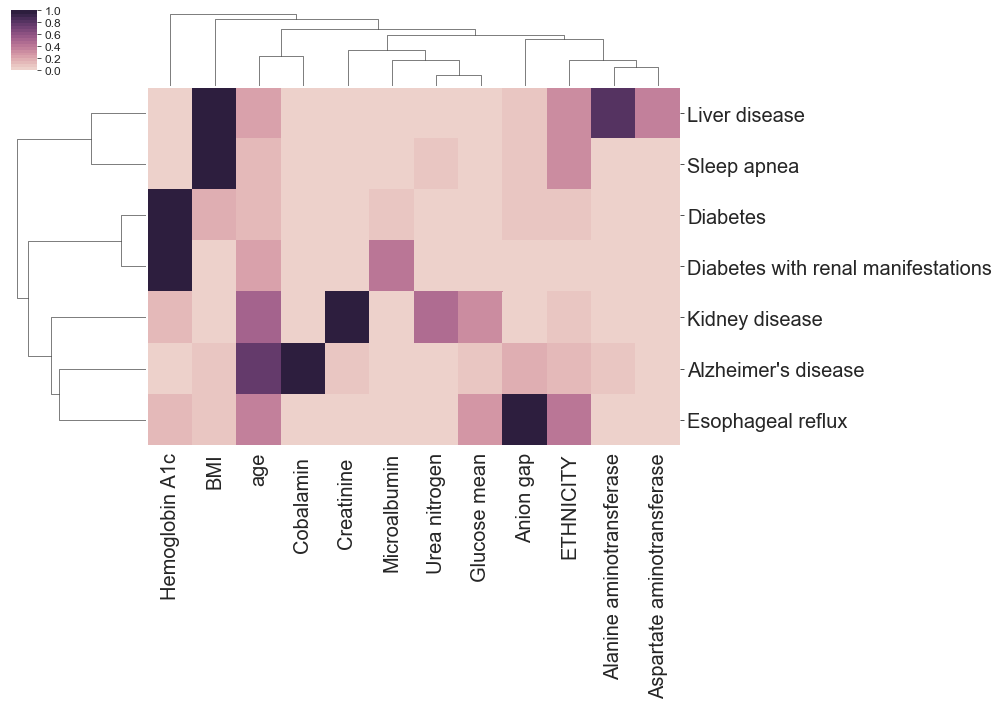

<Figure size 432x288 with 0 Axes>

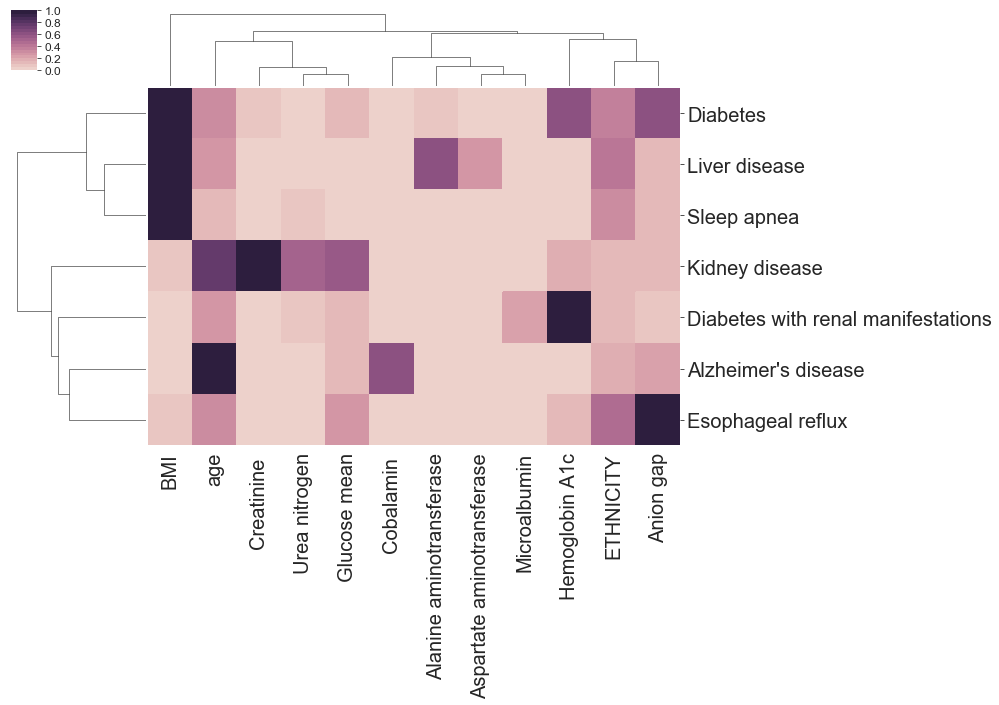

<Figure size 432x288 with 0 Axes>

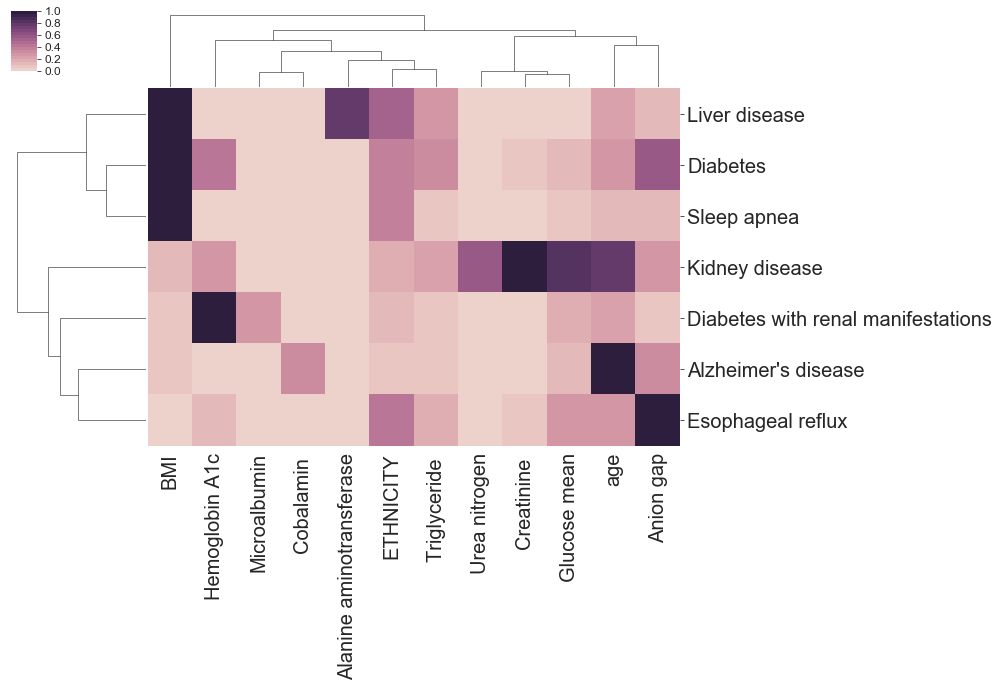

<Figure size 432x288 with 0 Axes>

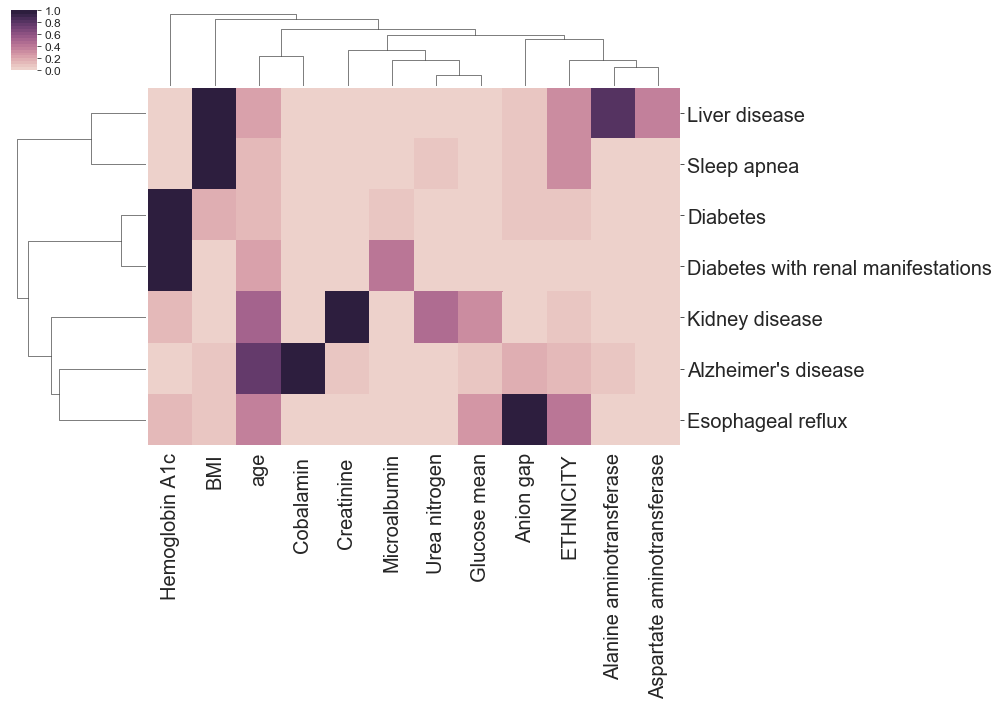

<Figure size 432x288 with 0 Axes>

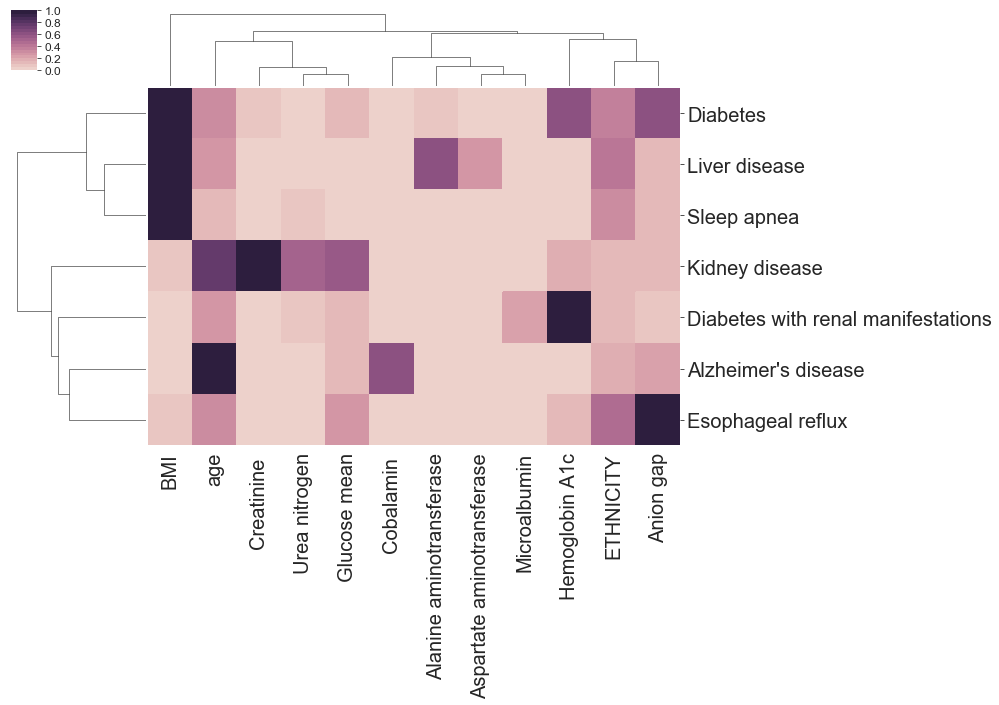

<Figure size 432x288 with 0 Axes>

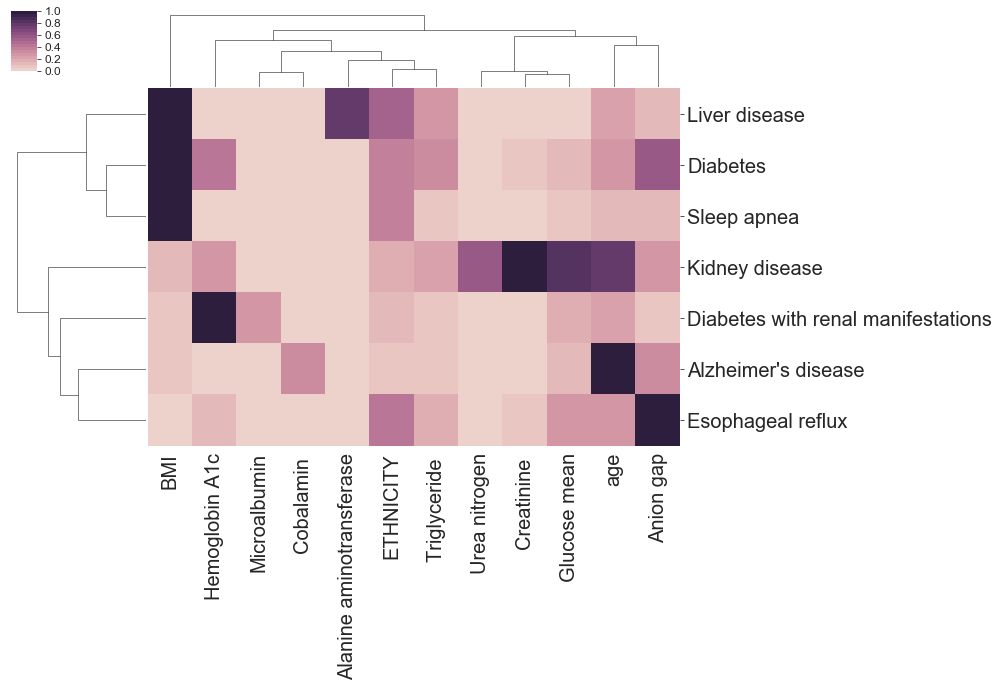

In [7]:
nf = 12
ml_nice = {
    'LR':'Logistic Regression',
    'RF':'Random Forest',
    'XGB':'XGBoost',
}
# df_fmap = pd.DataFrame(columns = dffa['feature'].unique())
for ml in ['LR','RF','XGB']:
    for i,dffa in enumerate([dfa, df_perm]):
        score = 'importance' if i==0 else 'permutation'
        for cut in ['1','182','365']:
            dfc = df_perm.loc[df_perm.cutoff==cut,:]
            frames = []
            for i, (disease,dfa_g) in enumerate(dfc.loc[dfc['algorithm']==ml].groupby('disease')):
                df = {}
            #     df['disease'] = datafeat[0]
                for f in dfa_g.feature.unique():
                    df[f] = dfa_g.loc[dfa_g['feature']==f]['score'].median()
            #     print(df)
                frames.append(pd.DataFrame(df,index=[disease]))
            dfmat = pd.concat(frames)


            # drop least important features 
            import numpy as np
            max_scores = np.zeros(dfmat.shape[1])
            for i,c in enumerate(dfmat.columns):
                max_scores[i] = dfmat[c].max()

            order = [dfmat.columns[i] for i in np.argsort(max_scores)]
            # print('max_scores:',np.sort(max_scores))
            # print('order:',order)
        #     nf = len(order)
            dfmat.drop(columns = order[:len(order)-nf],axis=1,inplace=True)
            print(dfmat.shape)


            plt.figure()
            cmap = sns.cubehelix_palette(20)
        #     cmap = sns.color_palette('Blues')

            sns.axes_style({'ytick.major.size': 6.0})
            cg=sns.clustermap(data=dfmat,
                              standard_scale=0,
                              figsize=(12,8),
                              method='ward',
                              cmap=cmap,col_cluster=True,row_cluster=True)
            plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90,fontsize=20)
            plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0,fontsize=20)
            plt.tick_params(axis='y', which='major', labelsize=12)
            # plt.tight_layout()
#             plt.suptitle(ml_nice[ml]+', horizon='+{'1':'1 visit','182':'6 mos.','365':'1 yr.'}[cut])
#             cg.savefig('../paper/figs/'+resdir.replace('../','')+ '/imp_score/clustermaps/'+
#                        ml+'_feature_'+score+'_clustermap_cutoff_'+cut+'.pdf',bbox_inches='tight')
